# House Price Prediction and Analysis
ECE 569A Term Project

Hao Yu (V00949863)
Lu Lu (V00836042)
Pengjun Duan (V00931856)


In [30]:

import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math


from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score



# Pre-processing of the data

In [20]:
#load and preview data
data= pd.read_csv('data.csv') 
df= pd.DataFrame(data)


print(df.shape)

print('data preview:\n', '-'*55, sep='')
print(df.head())



(4600, 18)
data preview:
-------------------------------------------------------
                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          

In [21]:
#Split month, day and zip out
df[['Year','Month','Day']] = df.date.str.split("-",expand=True,)
df[['Date','Time']] = df.Day.str.split(" ",expand=True,)
df[['state','zip']] = df.statezip.str.split(" ",expand=True,)

print(df.head())

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  ...       city  statezip  country  \
0     1.5           0     0          3  ...  Shoreline  WA 98133      USA   
1     2.0           0     4          5  ...    Seattle  WA 98119      USA   
2     1.0           0     0          4  ...       Kent  WA 98042      USA   
3     1.0           0     0          4  ...   Bellevue  WA 98008      USA   
4     1.0           0     0          4  ...    Redmond  WA 98052      USA   

   Year Month          Day Date      Time state   

In [22]:
#Drop useless features/columns

data=df.drop(['date','street','statezip','country','Year','Day','state','Time'],axis=1)
print(data.head())

       price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   313000.0       3.0       1.50         1340      7912     1.5           0   
1  2384000.0       5.0       2.50         3650      9050     2.0           0   
2   342000.0       3.0       2.00         1930     11947     1.0           0   
3   420000.0       3.0       2.25         2000      8030     1.0           0   
4   550000.0       4.0       2.50         1940     10500     1.0           0   

   view  condition  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3        1340              0      1955          2005   
1     4          5        3370            280      1921             0   
2     0          4        1930              0      1966             0   
3     0          4        1000           1000      1963             0   
4     0          4        1140            800      1976          1992   

        city Month Date    zip  
0  Shoreline    05   02  98133  
1    Seattle  

In [23]:
#Change city, month and date to categorical number 
from sklearn import preprocessing

city=data.city.unique().astype('str')
le = preprocessing.LabelEncoder()
le.fit(city)
data['City']=le.transform(data.city.astype('str'))
print('city label:',list(le.classes_))

Month=data.Month.unique().astype('str')
le = preprocessing.LabelEncoder()
le.fit(Month)
data['month']=le.transform(data.Month.astype('str'))
print('month label:',list(le.classes_))

Date=data.Date.unique().astype('str')
le = preprocessing.LabelEncoder()
le.fit(Date)
data['date']=le.transform(data.Date.astype('str'))
print('date label:',list(le.classes_))

data['zip'] = pd.to_numeric(df['zip'])

data=data.drop(['city','Month','Date'],axis=1)
print(data.head())
print(data.shape)

city label: ['Algona', 'Auburn', 'Beaux Arts Village', 'Bellevue', 'Black Diamond', 'Bothell', 'Burien', 'Carnation', 'Clyde Hill', 'Covington', 'Des Moines', 'Duvall', 'Enumclaw', 'Fall City', 'Federal Way', 'Inglewood-Finn Hill', 'Issaquah', 'Kenmore', 'Kent', 'Kirkland', 'Lake Forest Park', 'Maple Valley', 'Medina', 'Mercer Island', 'Milton', 'Newcastle', 'Normandy Park', 'North Bend', 'Pacific', 'Preston', 'Ravensdale', 'Redmond', 'Renton', 'Sammamish', 'SeaTac', 'Seattle', 'Shoreline', 'Skykomish', 'Snoqualmie', 'Snoqualmie Pass', 'Tukwila', 'Vashon', 'Woodinville', 'Yarrow Point']
month label: ['05', '06', '07']
date label: ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31']
       price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0   313000.0       3.0       1.50         1340      7912     1.5           0   
1  2384000.0   

In [24]:
#drop nan vaules 
data=data.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
# data=data.loc[(data['price']!=0)].dropna()

X=data.iloc[:,1:]
y=data.iloc[:,0]
print('Dataset after removing missing value and transforming categorical data:', X.shape)
print(X.head())


Dataset after removing missing value and transforming categorical data: (4600, 16)
   bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0       3.0       1.50         1340      7912     1.5           0     0   
1       5.0       2.50         3650      9050     2.0           0     4   
2       3.0       2.00         1930     11947     1.0           0     0   
3       3.0       2.25         2000      8030     1.0           0     0   
4       4.0       2.50         1940     10500     1.0           0     0   

   condition  sqft_above  sqft_basement  yr_built  yr_renovated    zip  City  \
0          3        1340              0      1955          2005  98133    36   
1          5        3370            280      1921             0  98119    35   
2          4        1930              0      1966             0  98042    18   
3          4        1000           1000      1963             0  98008     3   
4          4        1140            800      1976          1992  9

# Wrapper Method
https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

# Recursive Feature Elimination

The Recursive Feature Elimination (RFE) method works by recursively removing attributes and building a model on those attributes that remain. It uses accuracy metric to rank the feature according to their importance. The RFE method takes the model to be used and the number of required features as input.

To find the optimum number of features, for which the accuracy is the highest. We do that by using loop starting with 1 feature and going up to 13. We then take the one for which the accuracy is highest.


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

#no of features
nof_list=np.arange(1,16)            
high_score=0

#Variable to store the optimum features
nof=0           
score_list =[]

#split training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 0)

for n in range(len(nof_list)):
#     X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 0)
    model = RandomForestRegressor()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))
print(score_list)
    

/Users/jennyyu/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/Users/jennyyu/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/Users/jennyyu/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/Users/jennyyu/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass n_features_to_select=4 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
/Users/jennyyu/anaconda3/lib/pyt

Optimum number of features: 7
Score with 7 features: 0.573944
[0.1941882351942561, 0.16852976951597354, 0.06470687543801179, 0.27941919438175256, 0.48840507469908034, 0.4658053196620754, 0.5739442591726476, 0.3153655615337482, 0.35215155395822084, 0.33982834286837316, 0.48833532555891135, 0.4167655517811464, 0.5012681200820056, 0.35507608098261545, 0.5375653492279762]


The optimum number of features is 7. We now feed 7 as number of features to RFE and get the final set of features given by RFE method, as follows:

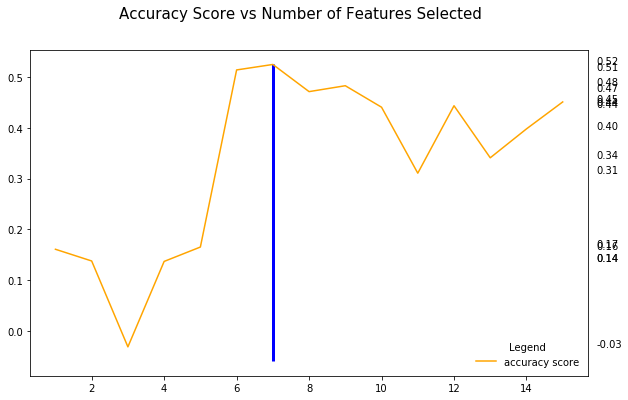

In [18]:
#Accuracy Score vs Number of Features Selected
max_iter = []
for i in range(1,16):
    max_iter.append(i)
    
A = np.array(max_iter)
B = np.array([0.1606640774261573, 0.13758474202251225, -0.03164196987787138, 0.13672284325343076, 
             0.16507160368429308, 0.5140880405867381, 0.5248645434956942, 0.47134140476436714, 
             0.482958141991477, 0.44061771810754824, 0.3106341498362609,
             0.4435288132354708, 0.3409459066573267, 0.39792130561994377, 0.45102846407982555])

fig, ax = plt.subplots(1, figsize=(10, 6))

fig.suptitle('Accuracy Score vs Number of Features Selected', fontsize=15)
ax.plot(A, B, color="orange", label="accuracy score")
plt.legend(loc="lower right", title="Legend", frameon=False)

for var in B:
    plt.annotate('%0.2f' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points')

    
plt.vlines(max_iter[6], plt.ylim()[0], np.max(Y), color='blue',
           linewidth=3, label='Optimum on test')


    
plt.show()

In [50]:
cols = list(X.columns)
model = RandomForestRegressor()
#Initializing RFE model
rfe = RFE(model, 7)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

/Users/jennyyu/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Index(['sqft_living', 'sqft_lot', 'sqft_above', 'yr_built', 'zip', 'City',
       'date'],
      dtype='object')


The ranking of all the variables, 1 being most important. 

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

cols = list(X.columns)
model = RandomForestRegressor()
#Initializing RFE model
rfe = RFE(model, 1)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
# print(selected_features_rfe)
# print(rfe.support_)
print(rfe.ranking_)

tf = pd.DataFrame(list(zip(cols, rfe.ranking_)), 
               columns=['feature','ranking']) 
tf

/Users/jennyyu/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


[16  8  1  3 14 15 12 13  7 10  2 11  4  6  9  5]


,feature,ranking
0,bedrooms,16
1,bathrooms,8
2,sqft_living,1
3,sqft_lot,3
4,floors,14
5,waterfront,15
6,view,12
7,condition,13
8,sqft_above,7
9,sqft_basement,10


# Random Forest Regressor Performance

mean_absolute_error of rfr: 134490.28992876277
max_error of rfr: 1838920.38
R^2: 0.49038805387011464


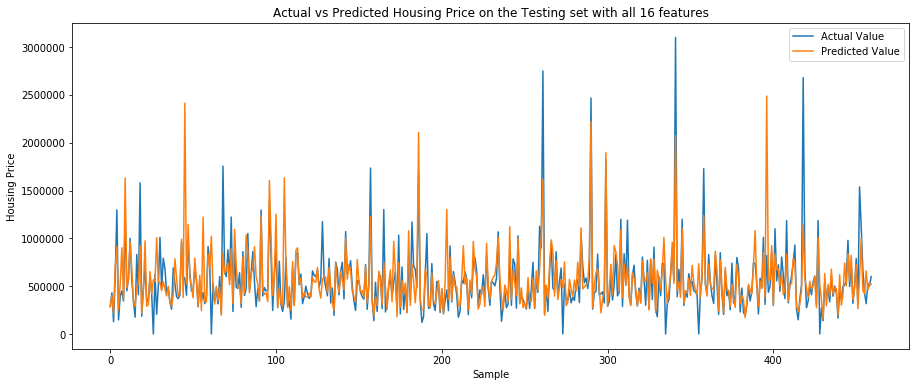

In [28]:
#Train Random Forest with all 16 futures
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor()

rfr= rfr.fit(X_train, y_train)
y_predtest=rfr.predict(X_test)


fig, ax = plt.subplots(figsize=(15, 6))
ax.set_xlabel("Sample")
ax.set_ylabel("Housing Price")
fig, ax .set_title("Actual vs Predicted Housing Price on the Testing set with all 16 features")


n=range(len(y_test))
ax.plot(n, y_test, label="Actual Value")
ax.plot(n, y_predtest, label="Predicted Value")
ax.legend()
plt.show

# Evaluation Matrix for RF trained on all 16 features
error=mean_absolute_error(y_test, y_predtest)
print('mean_absolute_error of rfr:',error)

maxe=max_error(y_test, y_predtest)
print('max_error of rfr:', maxe)

score=rfr.score(X_test, y_test)
print('R^2:',score)

In [151]:
X.columns


Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zip', 'City', 'month', 'date'],
      dtype='object')

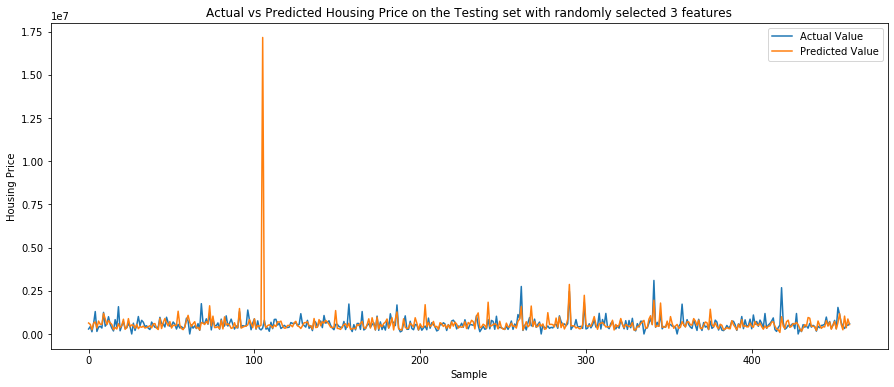

mean_absolute_error of rfr: 239934.15941393978
max_error of rfr: 16826353.5
R^2: -4.71502015861509


In [121]:
#Train Random Forest with the randomly selected 3 features

x_train=X_train.loc[:,['bedrooms', 'bathrooms', 'sqft_living']]
x_test=X_test.loc[:,['bedrooms', 'bathrooms', 'sqft_living']]



rfr=RandomForestRegressor()
rfr= rfr.fit(x_train, y_train)
y_predtest=rfr.predict(x_test)

fig, ax = plt.subplots(figsize=(15, 6))
ax.set_xlabel("Sample")
ax.set_ylabel("Housing Price")
fig, ax .set_title("Actual vs Predicted Housing Price on the Testing set with randomly selected 3 features")


n=range(len(y_test))
ax.plot(n, y_test, label="Actual Value")
ax.plot(n, y_predtest, label="Predicted Value")
ax.legend()
plt.show()


error=mean_absolute_error(y_test, y_predtest)
print('mean_absolute_error of rfr:',error)

maxe=max_error(y_test, y_predtest)
print('max_error of rfr:', maxe)

score=rfr.score(x_test, y_test)
print('R^2:',score)


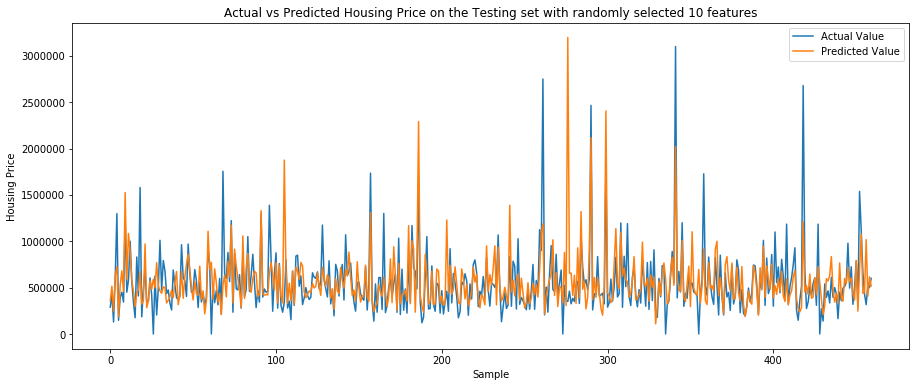

mean_absolute_error of rfr: 176231.3425800337
max_error of rfr: 2848557.38
R^2: 0.2994539144639611


In [97]:
#Train Random Forest with the randomly selected 10 features

x_train=X_train.loc[:,['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront',
                       'view', 'condition', 'sqft_above', 'sqft_basement']]
x_test =X_test.loc[:,['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','waterfront', 
                     'view', 'condition', 'sqft_above', 'sqft_basement']]

rfr=RandomForestRegressor()
rfr= rfr.fit(x_train, y_train)
y_predtest=rfr.predict(x_test)

fig, ax = plt.subplots(figsize=(15, 6))
ax.set_xlabel("Sample")
ax.set_ylabel("Housing Price")
fig, ax .set_title("Actual vs Predicted Housing Price on the Testing set with randomly selected 10 features")


n=range(len(y_test))
ax.plot(n, y_test, label="Actual Value")
ax.plot(n, y_predtest, label="Predicted Value")
ax.legend()
plt.show()


error=mean_absolute_error(y_test, y_predtest)
print('mean_absolute_error of rfr:',error)

maxe=max_error(y_test, y_predtest)
print('max_error of rfr:', maxe)

score=rfr.score(x_test, y_test)
print('R^2:',score)

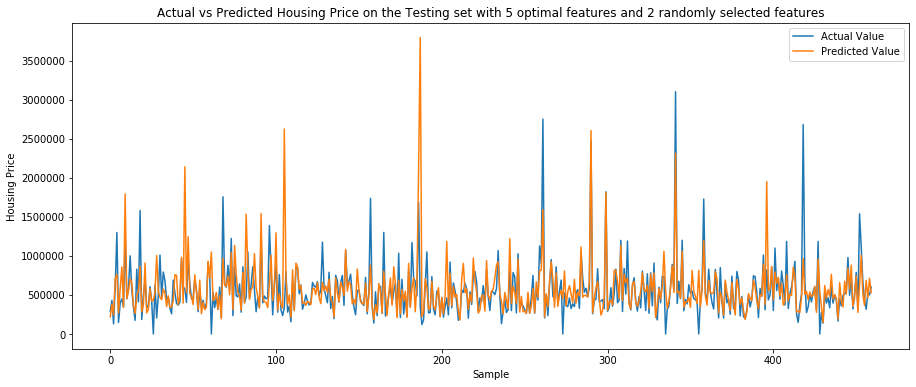

mean_absolute_error of rfr: 151586.9263877099
max_error of rfr: 3450328.33
R^2: 0.22308721897974804


In [134]:
#Train Random Forest with 5 optimal features and 2 randomly selected features

x_train=X_train.loc[:,['sqft_living', 'sqft_lot', 'sqft_above', 'yr_built', 'zip', 'waterfront','condition']]
x_test =X_test.loc[:,['sqft_living', 'sqft_lot', 'sqft_above', 'yr_built', 'zip', 'waterfront','condition']]


rfr=RandomForestRegressor()
rfr= rfr.fit(x_train, y_train)
y_predtest=rfr.predict(x_test)

fig, ax = plt.subplots(figsize=(15, 6))
ax.set_xlabel("Sample")
ax.set_ylabel("Housing Price")
fig, ax .set_title("Actual vs Predicted Housing Price on the Testing set with 5 optimal features and 2 randomly selected features")


n=range(len(y_test))
ax.plot(n, y_test, label="Actual Value")
ax.plot(n, y_predtest, label="Predicted Value")
ax.legend()
plt.show()


error=mean_absolute_error(y_test, y_predtest)
print('mean_absolute_error of rfr:',error)

maxe=max_error(y_test, y_predtest)
print('max_error of rfr:', maxe)

score=rfr.score(x_test, y_test)
print('R^2:',score)

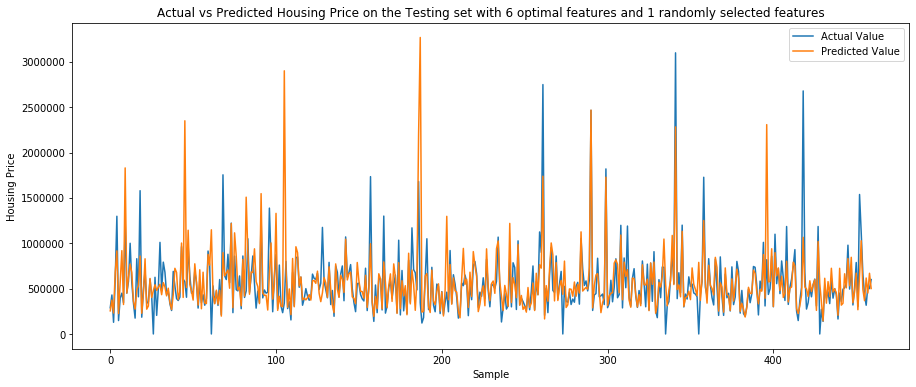

mean_absolute_error of rfr: 143188.6084776026
max_error of rfr: 2924469.5388888903
R^2: 0.2608274155901714


In [135]:
#Train Random Forest with 6 optimal features and 1 randomly selected features

x_train=X_train.loc[:,['sqft_living', 'sqft_lot', 'sqft_above', 'yr_built', 'zip', 'City','condition']]
x_test =X_test.loc[:,['sqft_living', 'sqft_lot', 'sqft_above', 'yr_built', 'zip', 'City','condition']]


rfr=RandomForestRegressor()
rfr= rfr.fit(x_train, y_train)
y_predtest=rfr.predict(x_test)

fig, ax = plt.subplots(figsize=(15, 6))
ax.set_xlabel("Sample")
ax.set_ylabel("Housing Price")
fig, ax .set_title("Actual vs Predicted Housing Price on the Testing set with 6 optimal features and 1 randomly selected features")


n=range(len(y_test))
ax.plot(n, y_test, label="Actual Value")
ax.plot(n, y_predtest, label="Predicted Value")
ax.legend()
plt.show()


error=mean_absolute_error(y_test, y_predtest)
print('mean_absolute_error of rfr:',error)

maxe=max_error(y_test, y_predtest)
print('max_error of rfr:', maxe)

score=rfr.score(x_test, y_test)
print('R^2:',score)

mean_absolute_error of rfr: 131453.1034834516
max_error of rfr: 1509929.19
R^2: 0.5435487288234949


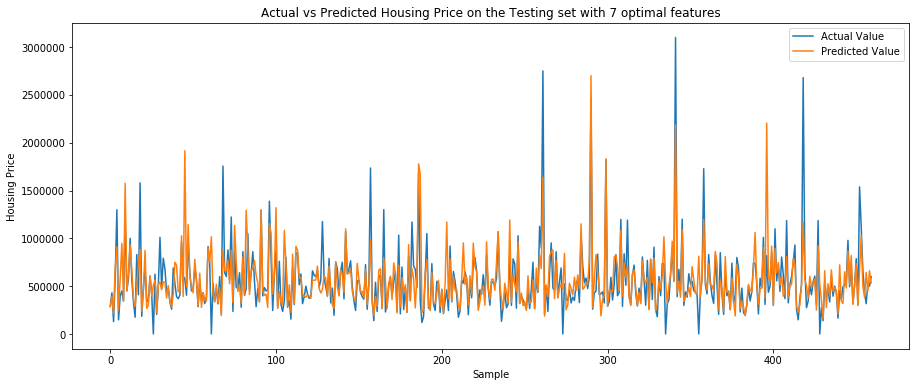

In [157]:
#Train Random Forest with the optimal 7 features

x_train=X_train.loc[:,['sqft_living', 'sqft_lot', 'sqft_above', 'yr_built', 'zip', 'City','date']]
x_test=X_test.loc[:,['sqft_living', 'sqft_lot', 'sqft_above', 'yr_built', 'zip', 'City','date']]

rfr=RandomForestRegressor()
rfr= rfr.fit(x_train, y_train)
y_predtest=rfr.predict(x_test)


fig, ax = plt.subplots(figsize=(15, 6))
ax.set_xlabel("Sample")
ax.set_ylabel("Housing Price")
fig, ax .set_title("Actual vs Predicted Housing Price on the Testing set with 7 optimal features")


n=range(len(y_test))
ax.plot(n, y_test, label="Actual Value")
ax.plot(n, y_predtest, label="Predicted Value")
ax.legend()
plt.show

# Evaluation Matrix for RF trained on all 16 features
error=mean_absolute_error(y_test, y_predtest)
print('mean_absolute_error of rfr:',error)

maxe=max_error(y_test, y_predtest)
print('max_error of rfr:', maxe)

score=rfr.score(x_test, y_test)
print('R^2:',score)